## libraries

In [1]:
# data processing
import pandas as pd
import numpy as np
from sklearn import preprocessing

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import math

## data

classes
* 0 - healthy 
* 1 - chronic_back_pain
* 2 - Fibromyalgia (chronic widespread pain)
* 3 - various (joint pain + nonspecific neuropathic pain + postherpetic neuralgia + polyneuropathic pain)
 
demographic information
* age → years
* sex → f, m  

disease relevant information
* pain duration → months
* average pain intensity → 0-10
* current pain intensity → 0-10
* BDI (Beck Depression Inventory)
* PDQ (painDETECT)
* MQS (medication quantification scale)
* VR-12 PCS (veteran’s RAND 12 physical component score)
* VR-12 MCS (veteran’s RAND 12 mental component score)
* PDI (pain disability index)

In [2]:
tabular_Dinh = pd.read_excel('data/tabular_Dinh.xlsx')
print(tabular_Dinh.shape)
tabular_Dinh.sample(5)

(189, 14)


,Subject ID,Project prefix,Label,Age\n(years),Sex (m/f),Pain duration\n(months),Avg. pain\nIntensity \n(0 – 10),Curr. Pain \nIntensity\n(0 – 10),BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
171,171,various,3,52,f,204.0,6.0,6.0,16.0,21.0,10.20,28.585430,39.344247,30.0
52,52,healthy,0,65,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,69,healthy,0,50,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,44,healthy,0,61,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,various,3,57,m,264.0,4.0,3.0,10.0,11.0,13.25,27.918285,47.567325,29.0


In [3]:
tabular_Dinh.rename({
    'Project prefix': 'class',
    'Label': 'label',
    'Age\n(years)': 'age',
    'Sex (m/f)': 'sex',
    'Pain duration\n(months)': 'pain_duration',
    'Avg. pain\nIntensity \n(0 – 10)': 'avg_pain_intensity',
    'Curr. Pain \nIntensity\n(0 – 10)': 'curr_pain_intensity',
}, axis=1, inplace=True)
tabular_Dinh.drop(['Subject ID'], axis=1, inplace=True)

In [4]:
tabular_Dinh['class'].value_counts()

healthy              88
various              47
chronic_back_pain    34
Fibromyalgia         20
Name: class, dtype: int64

In [5]:
tabular_Heitmann = pd.read_excel('data/tabular_Heitmann.xlsx')
print(tabular_Heitmann.shape)
tabular_Heitmann.sample(5)

(41, 14)


,Subject ID,Project prefix,Label,Age (years),Sex (m/f),Pain duration (month),Avg. pain intensity (0-10),Curr. pain intensity (0-10),BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
4,4,chronic_back_pain,1,53,f,240.0,8,NaN,18,NaN,9.8,NaN,NaN,5.14
36,36,various,3,48,f,124.0,6,NaN,18,NaN,14.4,NaN,NaN,6.57
5,5,chronic_back_pain,1,62,f,120.0,5,NaN,16,NaN,9.7,NaN,NaN,2.57
3,3,chronic_back_pain,1,58,m,60.0,5,NaN,17,NaN,3.4,NaN,NaN,3.71
37,37,Fibromyalgia,2,50,m,10.0,7,NaN,9,NaN,3.8,NaN,NaN,5.86


In [6]:
tabular_Heitmann.rename({
    'Project prefix': 'class',
    'Label': 'label',
    'Age (years)': 'age',
    'Sex (m/f)': 'sex',
    'Pain duration (month)': 'pain_duration',
    'Avg. pain intensity (0-10)': 'avg_pain_intensity',
    'Curr. pain intensity (0-10)': 'curr_pain_intensity',
}, axis=1, inplace=True)
tabular_Heitmann.drop(['Subject ID'], axis=1, inplace=True)

In [7]:
tabular_Heitmann['class'].value_counts()

chronic_back_pain    26
various              12
Fibromyalgia          3
Name: class, dtype: int64

In [8]:
df = pd.concat([tabular_Dinh, tabular_Heitmann], ignore_index=True)
feats = ['pain_duration', 'avg_pain_intensity',
       'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS',
       'PDI']
df[feats] = df[feats].replace(0, np.nan)
df.sample(5)

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
110,chronic_back_pain,1,39,f,144.0,2.0,4.0,12.0,22.0,NaN,NaN,NaN,NaN
213,various,3,29,f,48.0,2.0,NaN,3.0,NaN,5.9,NaN,NaN,1.14
101,chronic_back_pain,1,73,f,108.0,8.0,6.0,24.0,26.0,11.3,NaN,NaN,NaN
152,various,3,57,f,72.0,6.0,5.0,42.0,17.0,5.7,27.269684,17.055158,53.00
45,healthy,0,73,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('Total Population:', len(df))
print('Total Healthy Patients:', (df['class']=='healthy').sum())
print('Total Patients with pain:', (df['class']!='healthy').sum())

Total Population: 230
Total Healthy Patients: 88
Total Patients with pain: 142


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,230.0,1.230435,1.209112,0.000000,0.000000,1.000000,3.000000,3.000000
age,230.0,56.708696,14.718832,18.000000,47.000000,57.000000,69.750000,86.000000
pain_duration,120.0,115.158333,105.778188,7.000000,36.000000,72.000000,180.000000,480.000000
avg_pain_intensity,121.0,5.564463,1.660916,2.000000,4.000000,6.000000,7.000000,9.000000
curr_pain_intensity,100.0,5.234000,1.913599,0.500000,4.000000,5.000000,6.850000,9.000000
BDI,139.0,15.946043,8.585818,1.000000,10.000000,15.000000,22.000000,42.000000
PDQ,80.0,17.431250,6.454683,4.000000,12.750000,18.000000,22.000000,32.000000
MQS,111.0,10.622973,6.691751,1.700000,5.000000,9.700000,13.500000,31.900000
VR-12 PCS,46.0,31.773643,7.787758,9.448495,27.609809,31.034908,36.620276,47.612678
VR-12 MCS,46.0,46.449620,11.959153,17.055158,38.369104,46.192842,56.314990,69.198832


In [11]:
classes = ['healthy', 'chronic_back_pain', 'Fibromyalgia', 'various']
df['class'].value_counts()

healthy              88
chronic_back_pain    60
various              59
Fibromyalgia         23
Name: class, dtype: int64

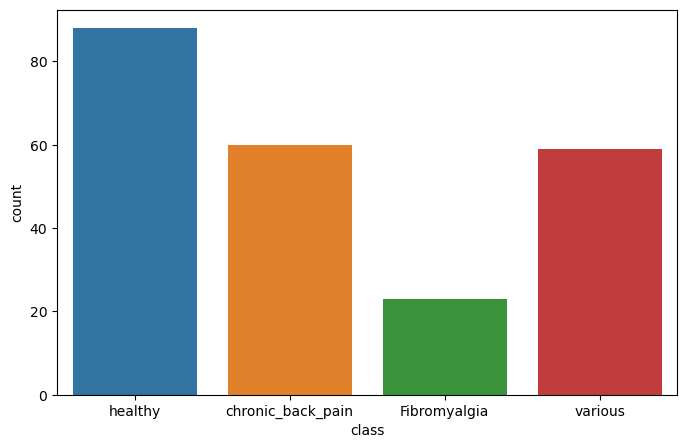

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=df)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                230 non-null    object 
 1   label                230 non-null    int64  
 2   age                  230 non-null    int64  
 3   sex                  230 non-null    object 
 4   pain_duration        120 non-null    float64
 5   avg_pain_intensity   121 non-null    float64
 6   curr_pain_intensity  100 non-null    float64
 7   BDI                  139 non-null    float64
 8   PDQ                  80 non-null     float64
 9   MQS                  111 non-null    float64
 10  VR-12 PCS            46 non-null     float64
 11  VR-12 MCS            46 non-null     float64
 12  PDI                  86 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 23.5+ KB


## missing values

In [14]:
# sum of missing values
df.isnull().sum()

class                    0
label                    0
age                      0
sex                      0
pain_duration          110
avg_pain_intensity     109
curr_pain_intensity    130
BDI                     91
PDQ                    150
MQS                    119
VR-12 PCS              184
VR-12 MCS              184
PDI                    144
dtype: int64

In [15]:
# percentage of missing values
(df.isnull().mean()*100).round(1)

class                   0.0
label                   0.0
age                     0.0
sex                     0.0
pain_duration          47.8
avg_pain_intensity     47.4
curr_pain_intensity    56.5
BDI                    39.6
PDQ                    65.2
MQS                    51.7
VR-12 PCS              80.0
VR-12 MCS              80.0
PDI                    62.6
dtype: float64

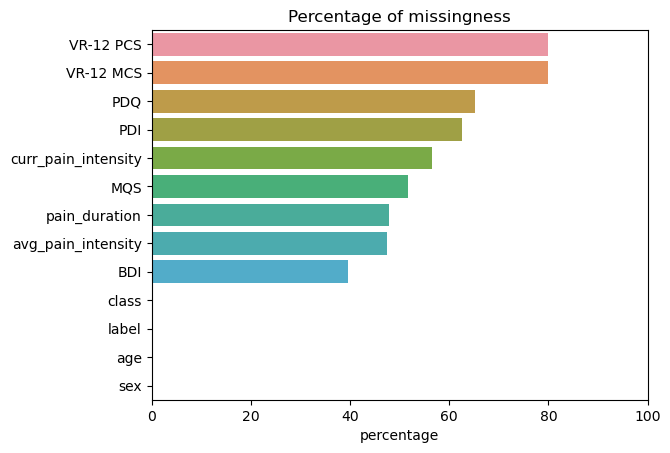

In [16]:
tmp_df = pd.DataFrame(df.isnull().mean()*100, columns=['percentage'])
tmp_df.sort_values('percentage', ascending=False, inplace=True)
sns.barplot(tmp_df, x='percentage', y=tmp_df.index).set(xlim=(0, 100))
plt.title('Percentage of missingness')
plt.show()

In [17]:
(df.notnull().mean()*100).round(1).sort_values(ascending=False)

class                  100.0
label                  100.0
age                    100.0
sex                    100.0
BDI                     60.4
avg_pain_intensity      52.6
pain_duration           52.2
MQS                     48.3
curr_pain_intensity     43.5
PDI                     37.4
PDQ                     34.8
VR-12 PCS               20.0
VR-12 MCS               20.0
dtype: float64

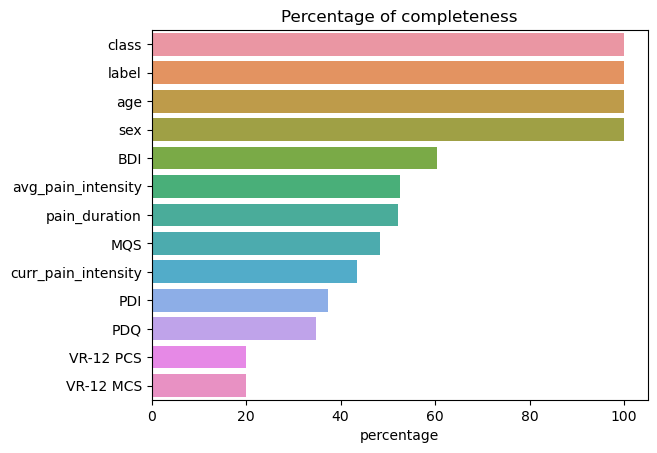

In [18]:
tmp_df = pd.DataFrame(df.notnull().mean()*100, columns=['percentage'])
tmp_df.sort_values('percentage', ascending=False, inplace=True)
sns.barplot(tmp_df, x='percentage', y=tmp_df.index)
plt.title('Percentage of completeness')
plt.show()

In [19]:
(df[df['class']!='healthy'].notnull().mean()*100).round(1).sort_values(ascending=False)

class                  100.0
label                  100.0
age                    100.0
sex                    100.0
BDI                     97.9
avg_pain_intensity      85.2
pain_duration           84.5
MQS                     78.2
curr_pain_intensity     70.4
PDI                     60.6
PDQ                     56.3
VR-12 PCS               32.4
VR-12 MCS               32.4
dtype: float64

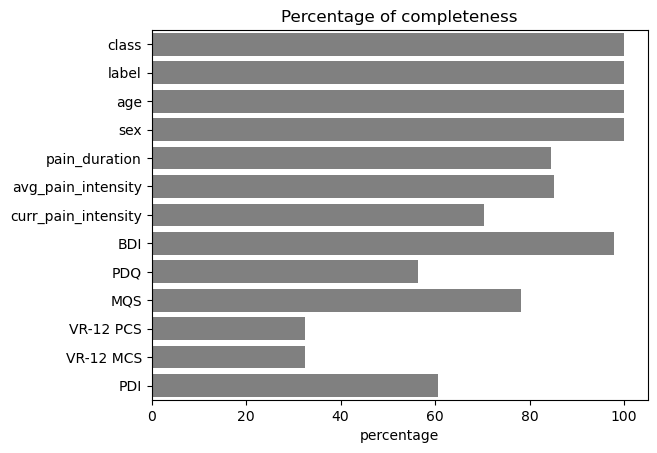

In [20]:
tmp_df = pd.DataFrame(df[df['class']!='healthy'].notnull().mean()*100, columns=['percentage'])
#tmp_df.sort_values('percentage', ascending=False, inplace=True)
sns.barplot(tmp_df, x='percentage', y=tmp_df.index, color='gray')
plt.title('Percentage of completeness')
plt.show()

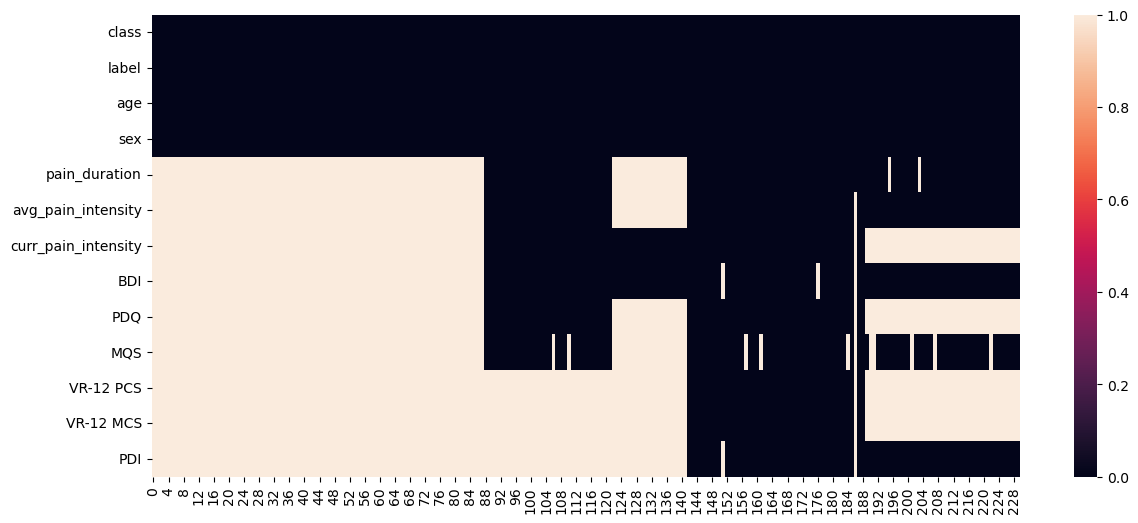

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull().T)
plt.show()

### correlation

In [22]:
feats = ['age', 'sex', 'pain_duration', 'avg_pain_intensity',
       'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS',
       'PDI']

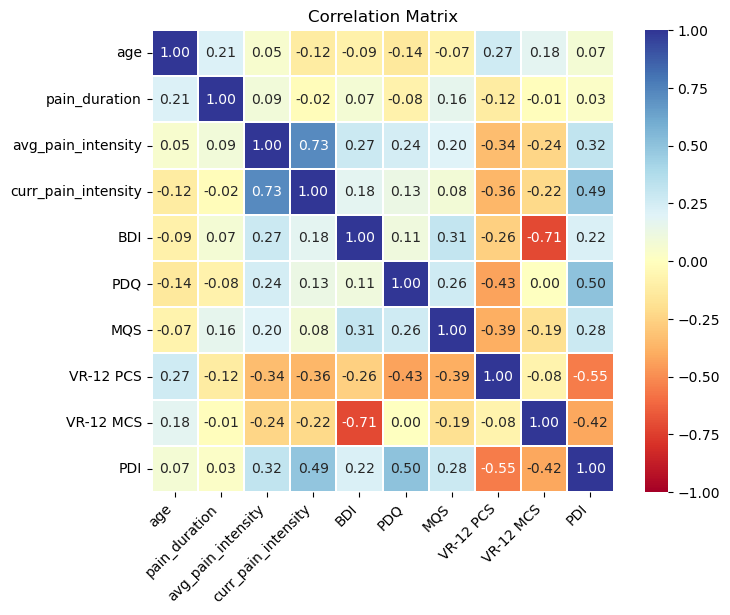

In [23]:
plt.figure(figsize=(8, 6))
fig = sns.heatmap(
    df[feats].corr(numeric_only=True), 
    vmin=-1, vmax=1, center=0,
    annot=True, 
    linewidths=0.05, 
    fmt= '.2f', 
    cmap='RdYlBu',
    square=True
)
fig.set_xticklabels(
    fig.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix')
plt.show()

## filling in missing values

* Fill in with 0
* mean/median
* interpolation (linear, nearest)
* **linear regression**
* **KNN**

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.linear_model import LinearRegression

In [25]:
patients_df = df[df['class']!='healthy'].copy()
patients_df

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
88,chronic_back_pain,1,67,m,360.0,5.0,5.0,3.0,28.0,4.0,NaN,NaN,NaN
89,chronic_back_pain,1,54,f,120.0,5.0,4.0,35.0,14.0,31.7,NaN,NaN,NaN
90,chronic_back_pain,1,64,f,96.0,7.0,5.0,7.0,16.0,11.4,NaN,NaN,NaN
91,chronic_back_pain,1,41,m,22.0,6.0,7.0,15.0,22.0,6.1,NaN,NaN,NaN
92,chronic_back_pain,1,72,m,480.0,8.0,8.0,11.0,10.0,8.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,various,3,48,f,124.0,6.0,NaN,18.0,NaN,14.4,NaN,NaN,6.57
226,Fibromyalgia,2,50,m,10.0,7.0,NaN,9.0,NaN,3.8,NaN,NaN,5.86
227,various,3,38,f,18.0,4.0,NaN,21.0,NaN,1.7,NaN,NaN,4.43
228,various,3,36,f,48.0,2.0,NaN,3.0,NaN,2.2,NaN,NaN,3.71


In [26]:
sample_df = patients_df.sample(10)
sample_df

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
146,various,3,57,f,84.0,7.0,6.0,20.0,15.0,3.40,24.249261,46.147121,38.00
218,chronic_back_pain,1,73,f,240.0,5.0,NaN,6.0,NaN,11.20,NaN,NaN,1.86
141,Fibromyalgia,2,60,f,NaN,NaN,3.7,28.0,NaN,NaN,NaN,NaN,NaN
121,chronic_back_pain,1,62,f,36.0,4.5,3.0,22.0,11.0,3.40,NaN,NaN,NaN
204,chronic_back_pain,1,58,f,19.0,7.0,NaN,24.0,NaN,12.40,NaN,NaN,5.57
145,various,3,57,m,84.0,7.5,8.0,15.0,32.0,22.35,9.448495,64.297687,59.00
120,chronic_back_pain,1,54,m,122.0,6.0,6.5,17.0,22.0,11.90,NaN,NaN,NaN
129,Fibromyalgia,2,56,f,NaN,NaN,2.9,22.0,NaN,NaN,NaN,NaN,NaN
186,various,3,60,m,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,various,3,57,m,96.0,7.0,5.0,11.0,28.0,10.90,31.305757,37.162658,35.00


### avg_pain_intensity vs curr_pain_intensity

In [27]:
patients_df.isnull().sum()

class                   0
label                   0
age                     0
sex                     0
pain_duration          22
avg_pain_intensity     21
curr_pain_intensity    42
BDI                     3
PDQ                    62
MQS                    31
VR-12 PCS              96
VR-12 MCS              96
PDI                    56
dtype: int64

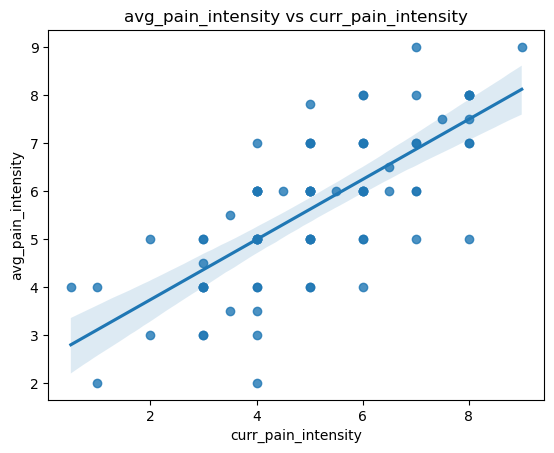

In [28]:
sns.regplot(y='avg_pain_intensity', x='curr_pain_intensity', data=df)
plt.title('avg_pain_intensity vs curr_pain_intensity')
plt.show()

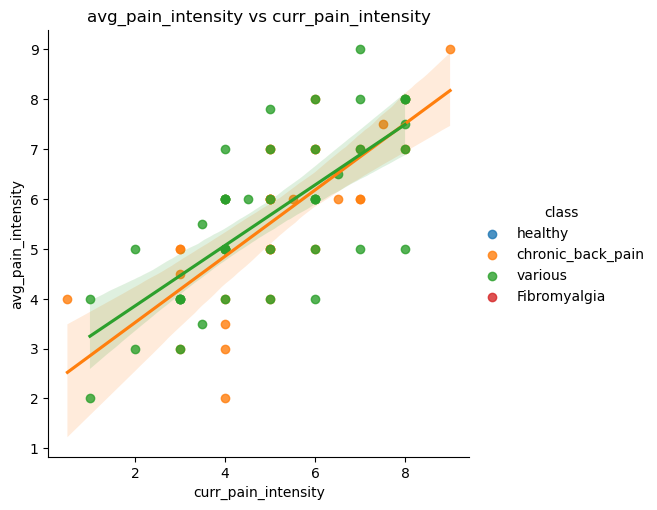

In [29]:
sns.lmplot(y='avg_pain_intensity', x='curr_pain_intensity', 
           hue='class', 
           hue_order=list(df['class'].value_counts().index),
           data=df)
plt.title('avg_pain_intensity vs curr_pain_intensity')
plt.show()

In [30]:
lr_imp = IterativeImputer(estimator=LinearRegression())
patients_df[['avg_pain_intensity', 'curr_pain_intensity']] = lr_imp.fit_transform(patients_df[['avg_pain_intensity', 'curr_pain_intensity']])
patients_df

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
88,chronic_back_pain,1,67,m,360.0,5.0,5.000000,3.0,28.0,4.0,NaN,NaN,NaN
89,chronic_back_pain,1,54,f,120.0,5.0,4.000000,35.0,14.0,31.7,NaN,NaN,NaN
90,chronic_back_pain,1,64,f,96.0,7.0,5.000000,7.0,16.0,11.4,NaN,NaN,NaN
91,chronic_back_pain,1,41,m,22.0,6.0,7.000000,15.0,22.0,6.1,NaN,NaN,NaN
92,chronic_back_pain,1,72,m,480.0,8.0,8.000000,11.0,10.0,8.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,various,3,48,f,124.0,6.0,5.448337,18.0,NaN,14.4,NaN,NaN,6.57
226,Fibromyalgia,2,50,m,10.0,7.0,6.395537,9.0,NaN,3.8,NaN,NaN,5.86
227,various,3,38,f,18.0,4.0,3.553938,21.0,NaN,1.7,NaN,NaN,4.43
228,various,3,36,f,48.0,2.0,1.659539,3.0,NaN,2.2,NaN,NaN,3.71


In [31]:
patients_df.isnull().sum()

class                   0
label                   0
age                     0
sex                     0
pain_duration          22
avg_pain_intensity      0
curr_pain_intensity     0
BDI                     3
PDQ                    62
MQS                    31
VR-12 PCS              96
VR-12 MCS              96
PDI                    56
dtype: int64

Text(0.5, 1.0, 'curr_pain_intensity distribution')

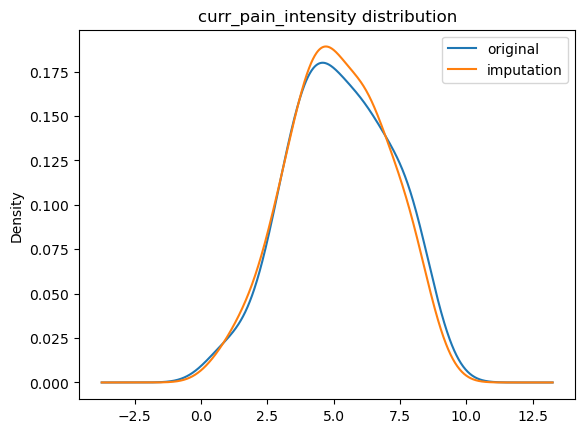

In [33]:
fig, ax = plt.subplots(1,1)
df['curr_pain_intensity'].plot.kde()
patients_df['curr_pain_intensity'].plot.kde()
plt.legend(['original', 'imputation'])
plt.title('curr_pain_intensity distribution')

Text(0.5, 1.0, 'avg_pain_intensity distribution')

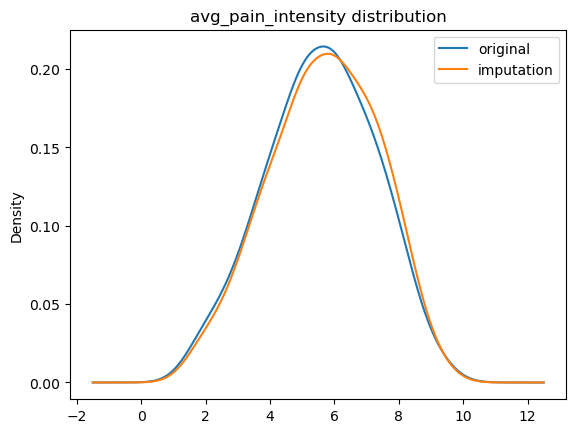

In [34]:
fig, ax = plt.subplots(1,1)
df['avg_pain_intensity'].plot.kde()
patients_df['avg_pain_intensity'].plot.kde()
plt.legend(['original', 'imputation'])
plt.title('avg_pain_intensity distribution')

### KNN per class

In [35]:
patients_df['class'].unique()

array(['chronic_back_pain', 'Fibromyalgia', 'various'], dtype=object)

In [36]:
# all features must be numeric for KNN
patients_df['sex'].replace({'f': 0, 'm': 1}, inplace=True)

#### chronic_back_pain

In [37]:
knn_imp = KNNImputer(n_neighbors=5)

In [38]:
# VR-12 PCS, VR-12 MCS not considered
cpb_patients_df = patients_df[patients_df['class']=='chronic_back_pain'].copy()
cpb_patients_df.head()

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
88,chronic_back_pain,1,67,1,360.0,5.0,5.0,3.0,28.0,4.0,NaN,NaN,NaN
89,chronic_back_pain,1,54,0,120.0,5.0,4.0,35.0,14.0,31.7,NaN,NaN,NaN
90,chronic_back_pain,1,64,0,96.0,7.0,5.0,7.0,16.0,11.4,NaN,NaN,NaN
91,chronic_back_pain,1,41,1,22.0,6.0,7.0,15.0,22.0,6.1,NaN,NaN,NaN
92,chronic_back_pain,1,72,1,480.0,8.0,8.0,11.0,10.0,8.4,NaN,NaN,NaN


In [39]:
cpb_patients_df.isnull().sum()

class                   0
label                   0
age                     0
sex                     0
pain_duration           1
avg_pain_intensity      0
curr_pain_intensity     0
BDI                     0
PDQ                    26
MQS                     6
VR-12 PCS              60
VR-12 MCS              60
PDI                    34
dtype: int64

In [40]:
feats_cpb_knn = ['age', 'sex', 'pain_duration', 'avg_pain_intensity',
                 'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'PDI']
cpb_patients_df[feats_cpb_knn].head()

,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,PDI
88,67,1,360.0,5.0,5.0,3.0,28.0,4.0,NaN
89,54,0,120.0,5.0,4.0,35.0,14.0,31.7,NaN
90,64,0,96.0,7.0,5.0,7.0,16.0,11.4,NaN
91,41,1,22.0,6.0,7.0,15.0,22.0,6.1,NaN
92,72,1,480.0,8.0,8.0,11.0,10.0,8.4,NaN


In [41]:
cpb_patients_df[feats_cpb_knn] = knn_imp.fit_transform(cpb_patients_df[feats_cpb_knn])

In [42]:
cpb_patients_df.isnull().sum()

class                   0
label                   0
age                     0
sex                     0
pain_duration           0
avg_pain_intensity      0
curr_pain_intensity     0
BDI                     0
PDQ                     0
MQS                     0
VR-12 PCS              60
VR-12 MCS              60
PDI                     0
dtype: int64

#### various

In [44]:
knn_imp = KNNImputer(n_neighbors=5)

In [45]:
various_df = patients_df[patients_df['class']=='various'].copy()
various_df.head()

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
142,various,3,59,0,60.0,4.0,3.0,11.0,16.0,13.50,34.924470,49.562336,16.0
143,various,3,48,0,108.0,4.0,3.0,13.0,28.0,15.40,14.577553,60.502458,28.0
144,various,3,73,0,24.0,5.0,5.0,7.0,11.0,13.50,34.875986,42.041961,16.0
145,various,3,57,1,84.0,7.5,8.0,15.0,32.0,22.35,9.448495,64.297687,59.0
146,various,3,57,0,84.0,7.0,6.0,20.0,15.0,3.40,24.249261,46.147121,38.0


In [46]:
various_df.isnull().sum()

class                   0
label                   0
age                     0
sex                     0
pain_duration           1
avg_pain_intensity      0
curr_pain_intensity     0
BDI                     3
PDQ                    13
MQS                     4
VR-12 PCS              13
VR-12 MCS              13
PDI                     2
dtype: int64

In [47]:
feats_various_knn = ['age', 'sex', 'pain_duration', 'avg_pain_intensity',
       'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS',
       'PDI']
various_df[feats_various_knn].head()

,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
142,59,0,60.0,4.0,3.0,11.0,16.0,13.50,34.924470,49.562336,16.0
143,48,0,108.0,4.0,3.0,13.0,28.0,15.40,14.577553,60.502458,28.0
144,73,0,24.0,5.0,5.0,7.0,11.0,13.50,34.875986,42.041961,16.0
145,57,1,84.0,7.5,8.0,15.0,32.0,22.35,9.448495,64.297687,59.0
146,57,0,84.0,7.0,6.0,20.0,15.0,3.40,24.249261,46.147121,38.0


In [48]:
various_df[feats_various_knn] = knn_imp.fit_transform(various_df[feats_various_knn])

In [49]:
various_df.isnull().sum()

class                  0
label                  0
age                    0
sex                    0
pain_duration          0
avg_pain_intensity     0
curr_pain_intensity    0
BDI                    0
PDQ                    0
MQS                    0
VR-12 PCS              0
VR-12 MCS              0
PDI                    0
dtype: int64

### final data

In [51]:
healthy_df = df[df['class']=='healthy'].copy()
fibromyalgia_df = patients_df[patients_df['class']=='Fibromyalgia'].copy()

In [52]:
final_df = pd.concat([cpb_patients_df,fibromyalgia_df,various_df])
final_df

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
88,chronic_back_pain,1,67.0,1.0,360.0,5.0,5.000000,3.0,28.0,4.0,NaN,NaN,3.914
89,chronic_back_pain,1,54.0,0.0,120.0,5.0,4.000000,35.0,14.0,31.7,NaN,NaN,3.744
90,chronic_back_pain,1,64.0,0.0,96.0,7.0,5.000000,7.0,16.0,11.4,NaN,NaN,3.030
91,chronic_back_pain,1,41.0,1.0,22.0,6.0,7.000000,15.0,22.0,6.1,NaN,NaN,4.658
92,chronic_back_pain,1,72.0,1.0,480.0,8.0,8.000000,11.0,10.0,8.4,NaN,NaN,3.914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,various,3,73.0,1.0,32.0,4.0,3.553938,18.0,17.2,12.0,35.555148,47.839146,6.000
225,various,3,48.0,0.0,124.0,6.0,5.448337,18.0,25.0,14.4,24.780921,45.663901,6.570
227,various,3,38.0,0.0,18.0,4.0,3.553938,21.0,14.8,1.7,38.202257,46.599627,4.430
228,various,3,36.0,0.0,48.0,2.0,1.659539,3.0,14.5,2.2,34.812939,55.302235,3.710


In [53]:
final_df.shape

(142, 13)

In [54]:
(final_df.notnull().mean()*100).round(1).sort_values(ascending=False)

class                  100.0
label                  100.0
age                    100.0
sex                    100.0
avg_pain_intensity     100.0
curr_pain_intensity    100.0
BDI                    100.0
pain_duration           85.9
PDI                     85.9
MQS                     85.2
PDQ                     83.8
VR-12 PCS               41.5
VR-12 MCS               41.5
dtype: float64

In [55]:
final_df.columns

Index(['class', 'label', 'age', 'sex', 'pain_duration', 'avg_pain_intensity',
       'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS',
       'PDI'],
      dtype='object')

In [56]:
knn_imp = KNNImputer(n_neighbors=5)
feats_knn = ['age', 'sex', 'pain_duration', 'avg_pain_intensity',
       'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'PDI']
final_df[feats_knn] = knn_imp.fit_transform(final_df[feats_knn])

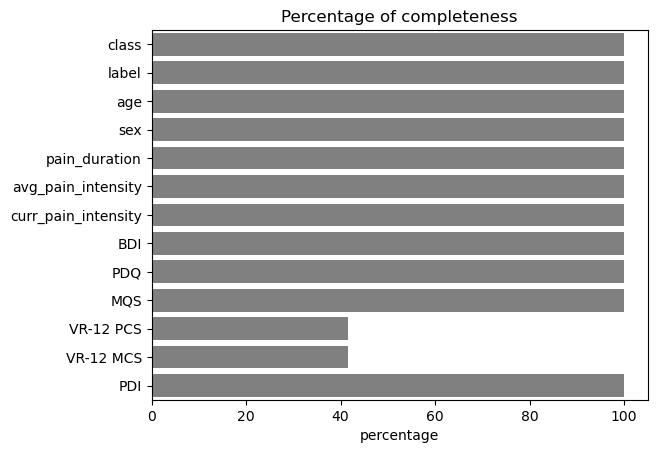

In [57]:
tmp_df = pd.DataFrame(final_df.notnull().mean()*100, columns=['percentage'])
#tmp_df.sort_values('percentage', ascending=False, inplace=True)
sns.barplot(tmp_df, x='percentage', y=tmp_df.index, color='gray')
plt.title('Percentage of completeness')
plt.show()